In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('breastCancer.csv')
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Benign: Not likely to get cancer (2)

# Malignant: Likely to get cancer (4)

In [4]:
data['class'].unique()

array([2, 4], dtype=int64)

In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

### We will change 2 and 4 to ---> 0 and 1 respectively 

In [6]:
data['class'] = data['class'].replace(2,0)

In [7]:
data['class'] = data['class'].replace(4,1)

In [8]:
data['class'].unique()

array([0, 1], dtype=int64)

# Attribute Information:

Sample code number: id number
Clump Thickness: 1 - 10, 
Uniformity of Cell Size: 1 - 10, 
Uniformity of Cell Shape: 1 - 10, 
Marginal Adhesion: 1 - 10, 
Single Epithelial Cell Size: 1 - 10, 
Bare Nuclei: 1 - 10, 
Bland Chromatin: 1 - 10, 
Normal Nucleoli: 1 - 10, 
Mitoses: 1 - 10, 
Class: (2 for benign, 4 for malignant)

In [9]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [10]:
data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [11]:
data['bare_nucleoli'].isna().sum()

0

In [12]:
data[data['bare_nucleoli'] == '?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


In [13]:
data[data['bare_nucleoli'] == '?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                               2
dtype: object

Alternatively

In [14]:
digits_in_bare_nucleoli= pd.DataFrame(data.bare_nucleoli.str.isdigit())
digits_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [15]:
data[digits_in_bare_nucleoli['bare_nucleoli']== False]

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,1
40,1096800,6,6,6,9,6,?,7,8,1,0
139,1183246,1,1,1,1,1,?,2,1,1,0
145,1184840,1,1,3,1,2,?,2,1,1,0
158,1193683,1,1,2,1,3,?,1,1,1,0
164,1197510,5,1,1,1,2,?,3,1,1,0
235,1241232,3,1,4,1,2,?,3,1,1,0
249,169356,3,1,1,1,2,?,3,1,1,0
275,432809,3,1,3,1,2,?,2,1,1,0
292,563649,8,8,8,1,2,?,6,10,1,1


In [16]:
df = data.replace('?' , np.nan)

In [17]:
df.isna().sum()

id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        16
bland_chromatin       0
normal_nucleoli       0
mitoses               0
class                 0
dtype: int64

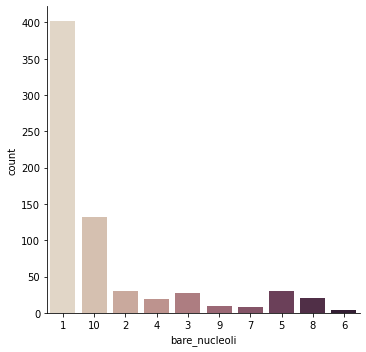

In [18]:
sns.catplot(x="bare_nucleoli", kind="count", palette="ch:.25", data=df)

we will not drop the NaNs in our dataset, we will rather replace them with the Median of the column. We can also use the Mode(i.e. the most frequent number in the column). The mean will not be a good idea in this case since the data is not normally distributed.

In [19]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      0.0
dtype: float64

In [20]:
df = df.fillna(df.median())

In [21]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [22]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [23]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [24]:
df.drop('id' , axis = 1 , inplace = True)

In [25]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


Univariate Data Analysis of the Class column

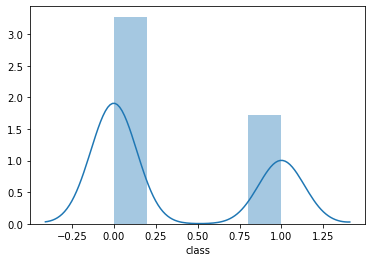

In [26]:
sns.distplot(df['class'])

Multivariate Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266E4703C10>,
      dtype=object)

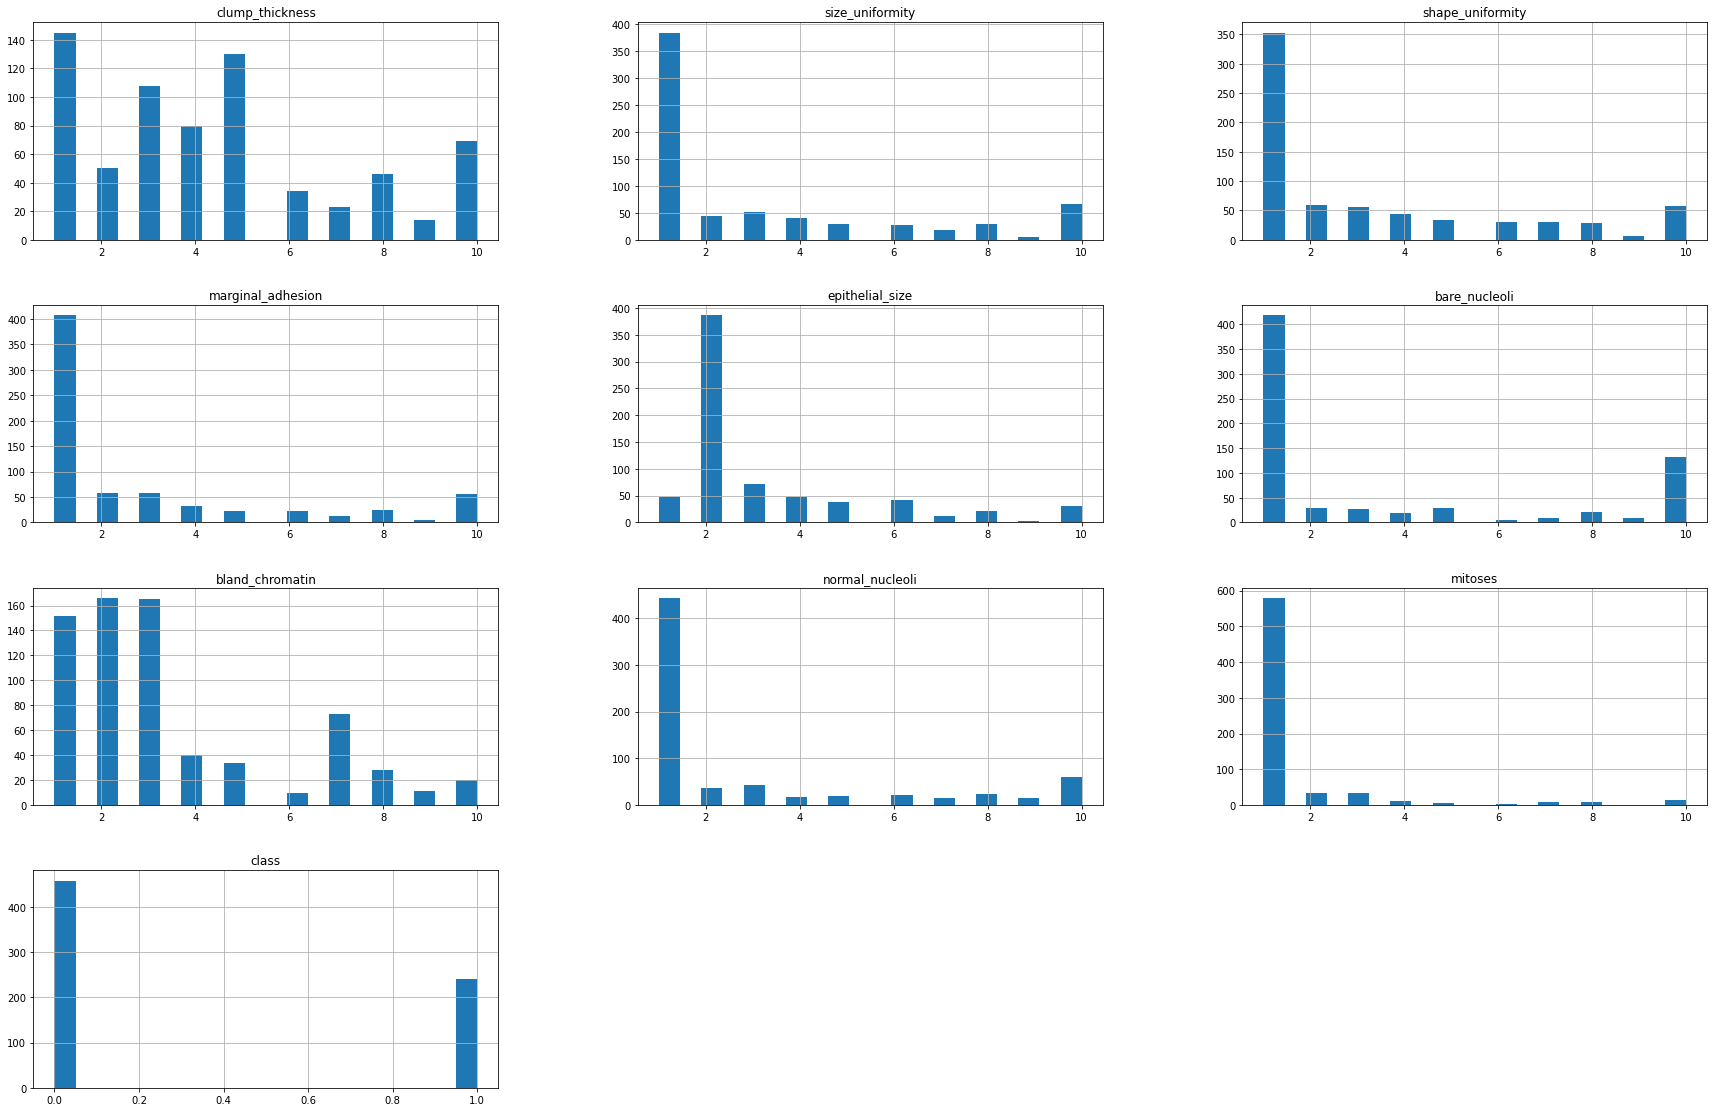

In [27]:
df.hist(bins = 20 , figsize = (30 , 30) , layout = (6,3))

Most of the features are right skewed

Correlation between the attributes

In [28]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


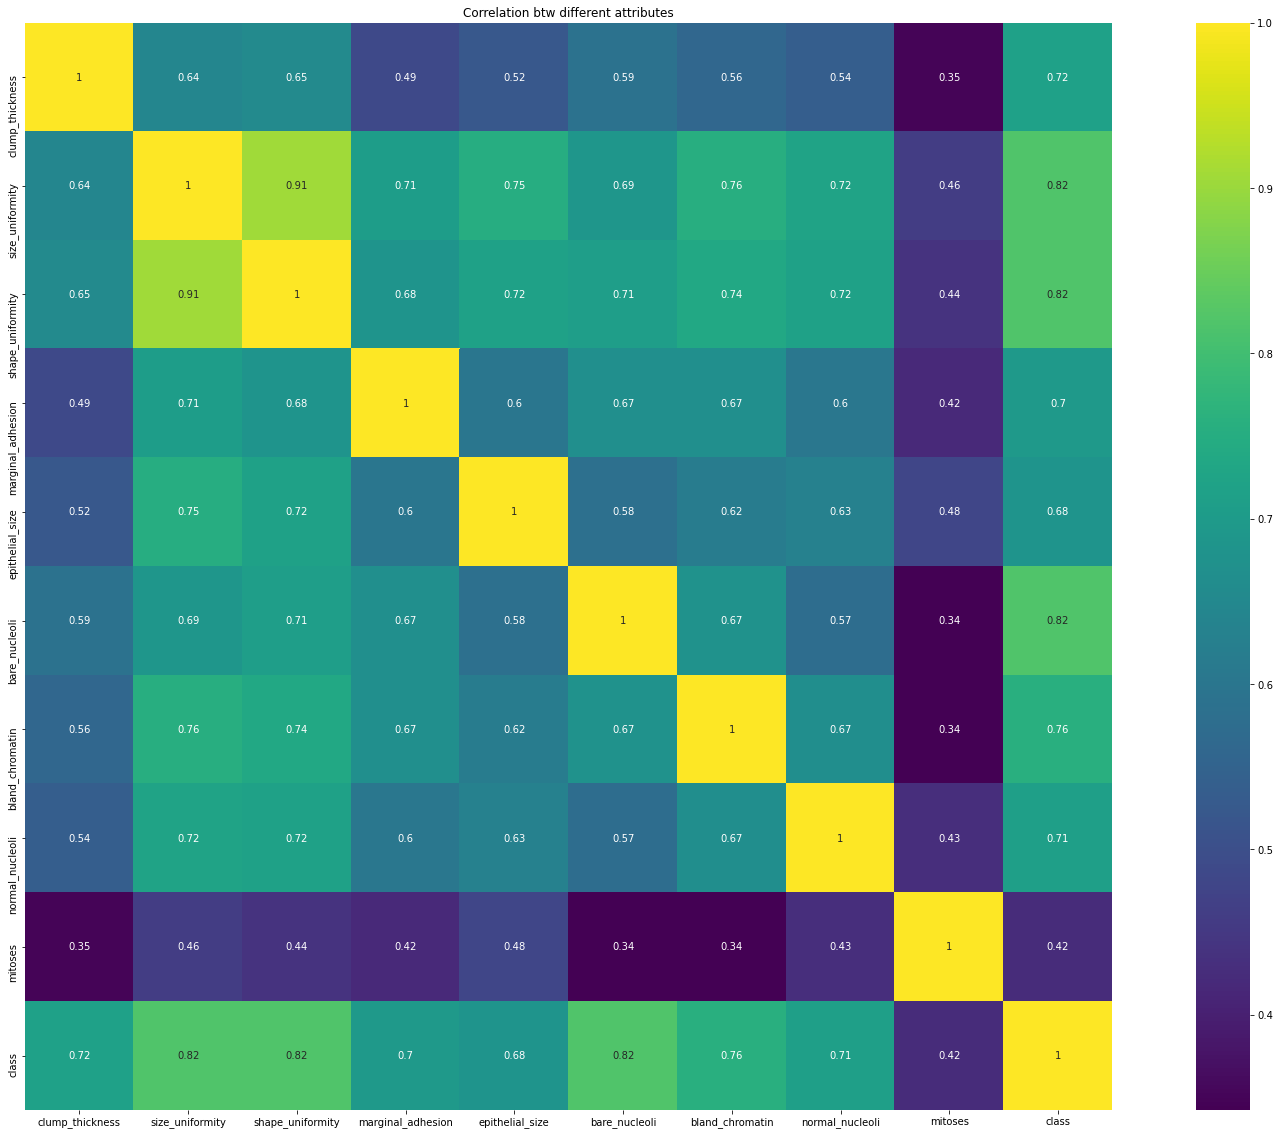

In [29]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr() , vmax = 1 , square = True , annot = True , cmap = 'viridis')
plt.title('Correlation btw different attributes')
plt.show()

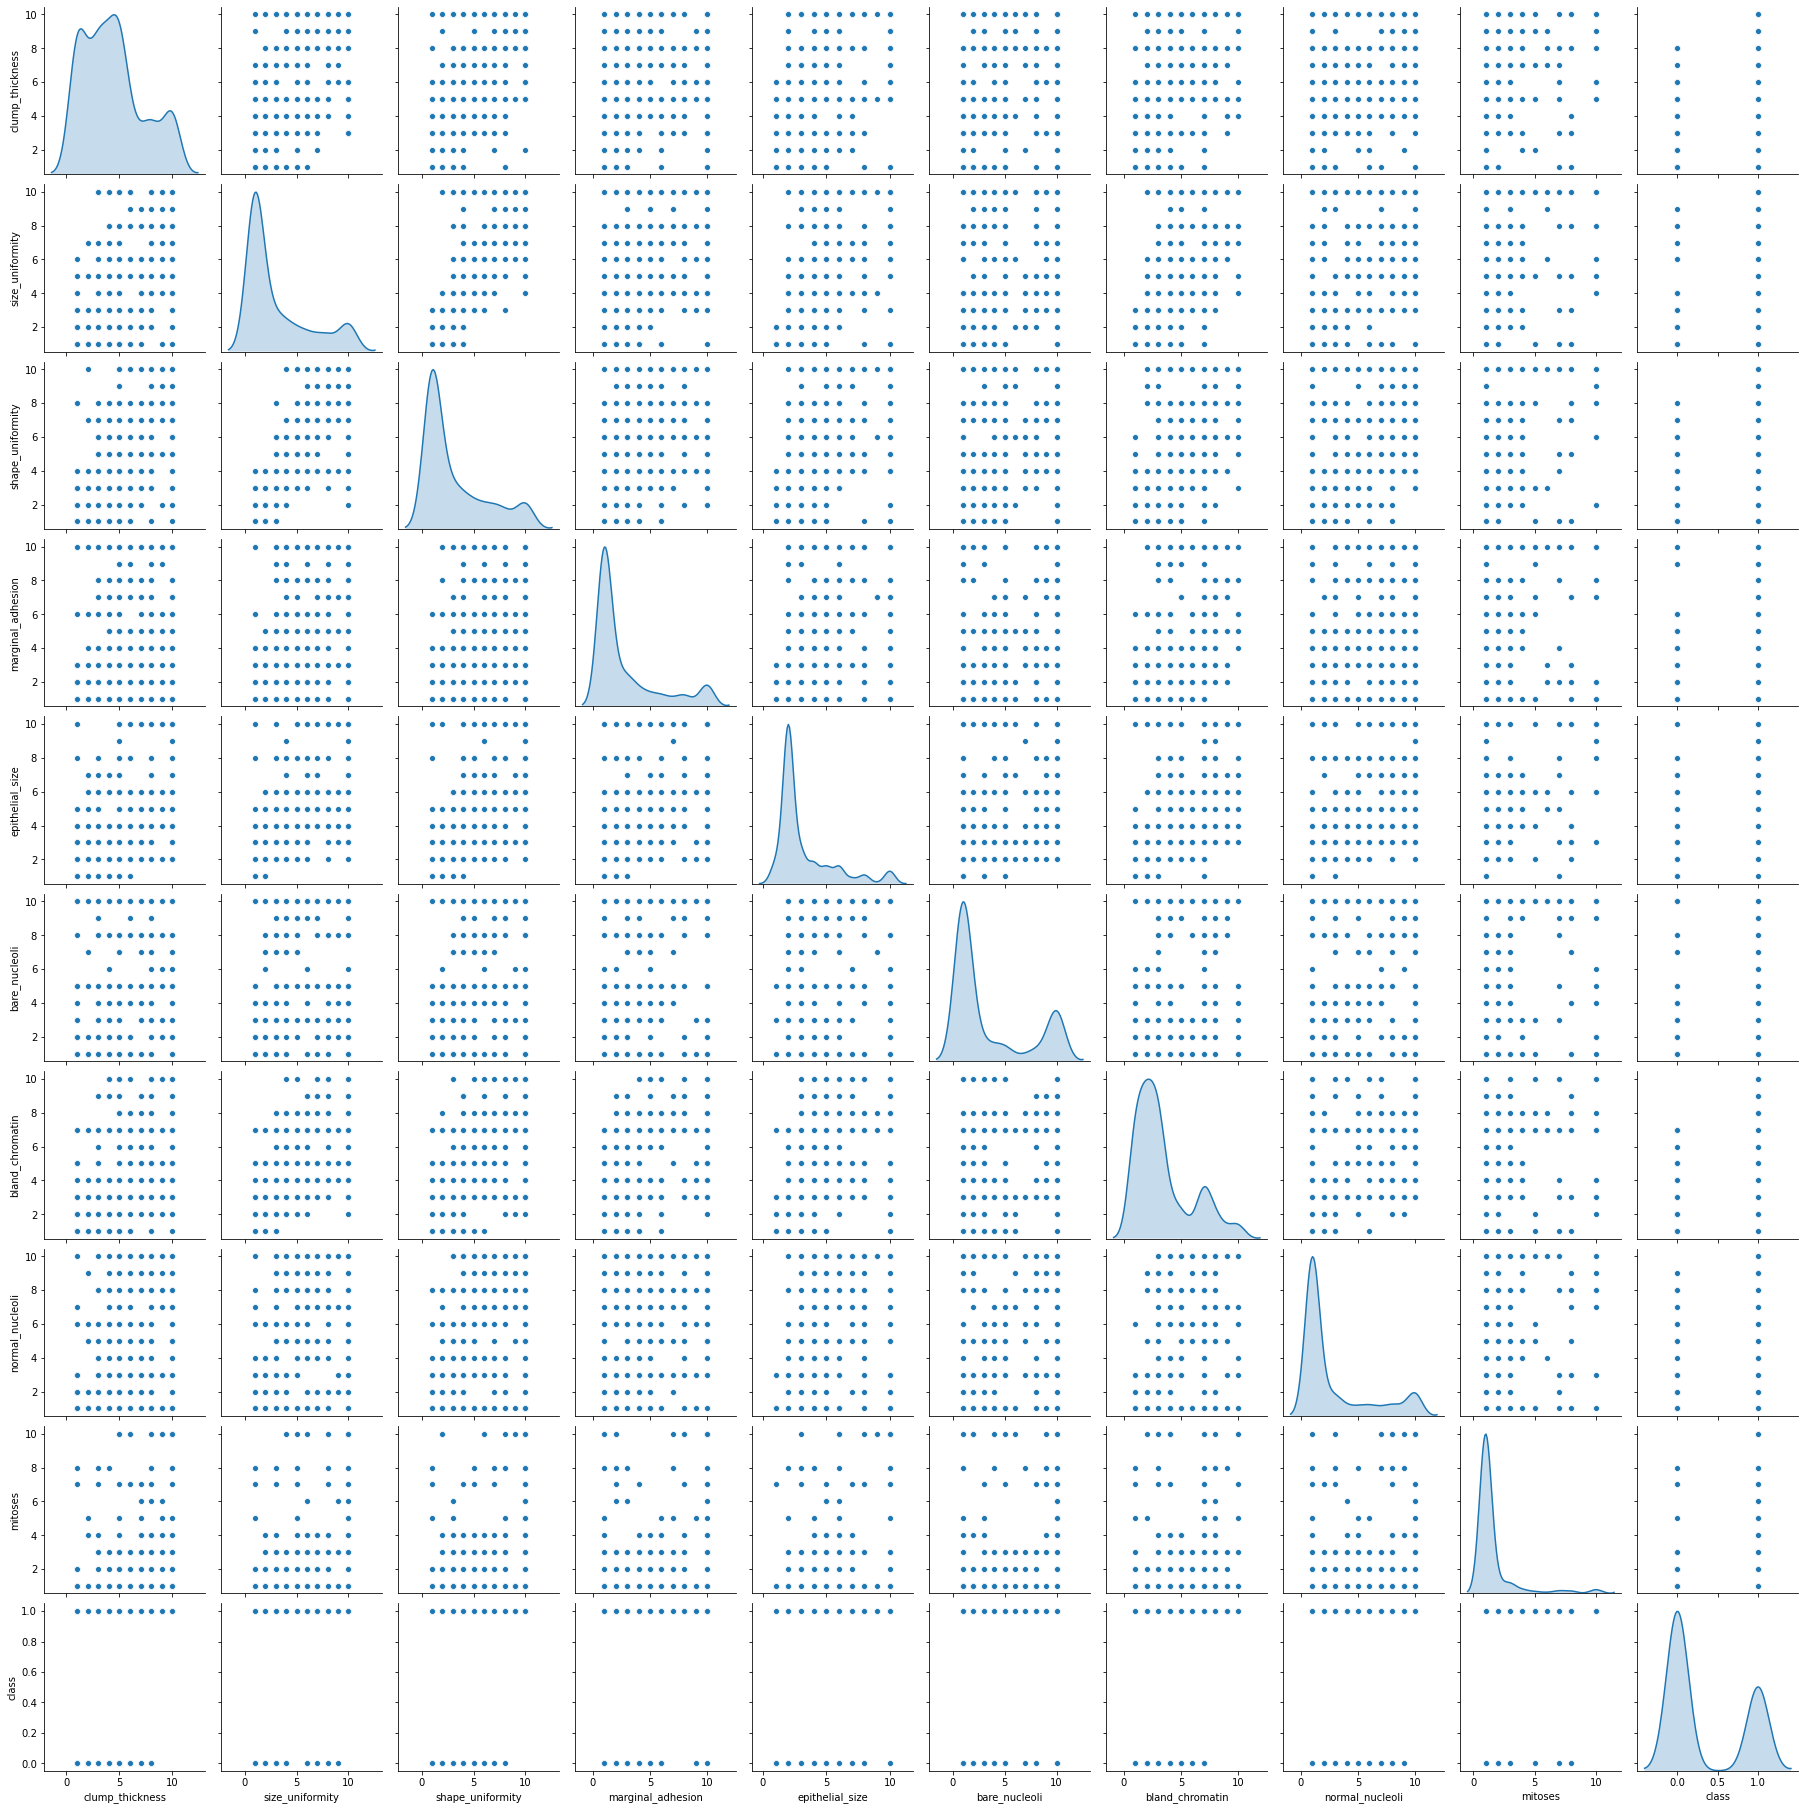

In [30]:
sns.pairplot(df , diag_kind = 'kde')

# Building Our Model

In [31]:
x = df.drop('class' , axis = 1)
y = df['class']

In [32]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 1)

# KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
KNN = KNeighborsClassifier(n_neighbors =  5 , weights = 'distance')

In [35]:
KNN.fit(x_train , y_train)

KNeighborsClassifier(weights='distance')

In [36]:
predicted_1 = KNN.predict(x_test)
predicted_1

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [37]:
from scipy.stats import zscore

print('KNeighborsClassifier Agorithm is predicting at {0:.2g}%'.format(KNN.score(x_test, y_test)*100))

KNeighborsClassifier Agorithm is predicting at 98%


Confusion Matrix For KNeighborsClassifier


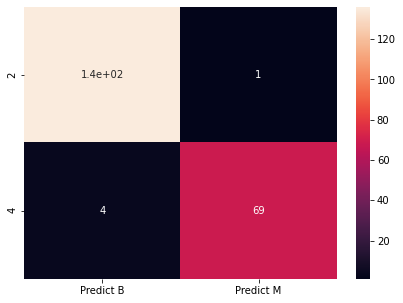

In [38]:
from sklearn import metrics

print("Confusion Matrix For KNeighborsClassifier")
cm=metrics.confusion_matrix(y_test, predicted_1, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict B","Predict M"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Support Vector Machine

In [39]:
from sklearn.svm import SVC

svc = SVC(gamma = 0.025 , C = 3 , kernel = 'linear')
svc.fit(x_train , y_train)

SVC(C=3, gamma=0.025, kernel='linear')

In [40]:
predicted_2 = svc.predict(x_test)
predicted_2

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [41]:
print('SupportVectorClassifier Agorithm is predicting at {0:.2g}%'.format(svc.score(x_test, y_test)*100))

SupportVectorClassifier Agorithm is predicting at 97%


In [42]:
knnPredictions=pd.DataFrame(predicted_1)
svcPredictions=pd.DataFrame(predicted_2)

In [43]:
df1 = pd.concat([knnPredictions,svcPredictions] ,axis =1 )

In [44]:
df1

,0,0
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
205,1,1
206,1,1
207,0,0
208,0,1


Confusion Matrix For SupportVectorMachine


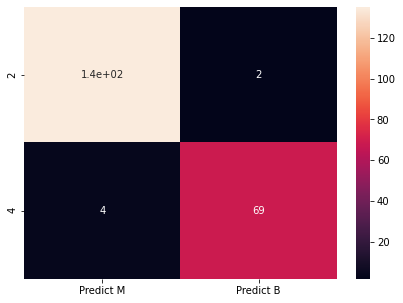

In [45]:
print("Confusion Matrix For SupportVectorMachine")
cm=metrics.confusion_matrix(y_test, predicted_2, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in [2,4]],
                  columns = [i for i in ["Predict M","Predict B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

# Feature Importance

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()      
rf = rf.fit(x_train, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

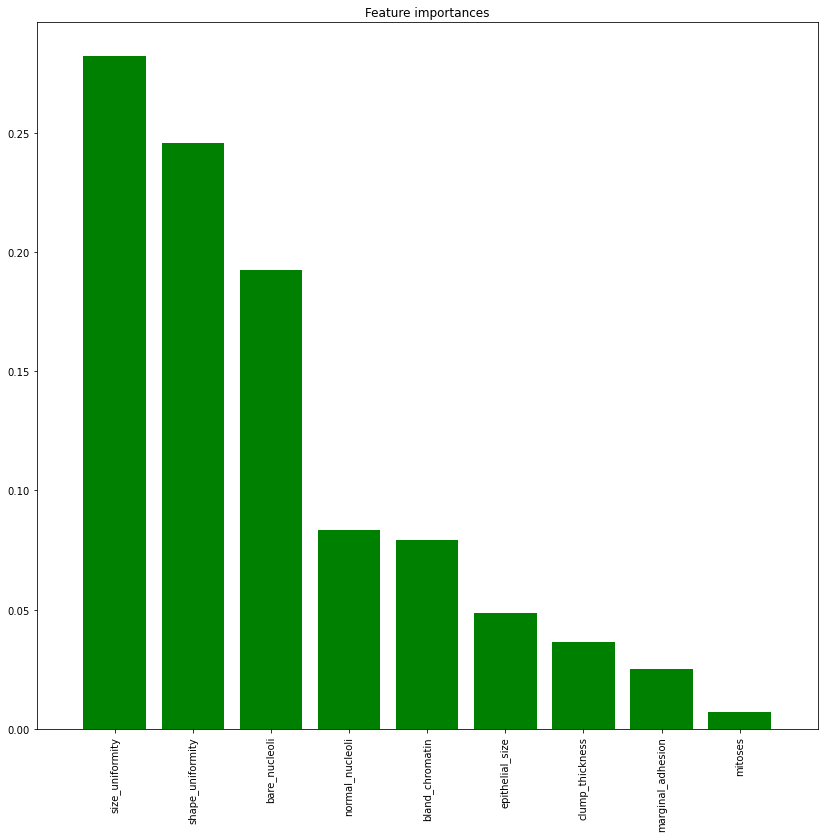

In [47]:
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g",  align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [48]:
import pickle

pickle.dump(KNN, open('model.pkl','wb'))

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

import pickle

# Creating a pickle file for the classifier
pickle.dump(scaler, open('scaler.pkl', 'wb')) 